| |<font size="5">Ridge نموذج </font>|
|-:|-:|
|<img src="https://cdn-images-1.medium.com/max/800/1*XC-8tHoMxrO3ogHKylRfRA.png" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Regularization الضبط في نماذج تعلم الآلة </font>| 
||<font size="4">Ridge  توظيف خوارزمية </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|

### Regularization   الضبط في نماذج تعلم الآلة
 
 

![](https://i0.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/Overfitting.png?resize=554%2C158&ssl=1)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200107015710/HighBias.jpg)

$\large h_\theta(x)= g(\theta_0 +\theta_1 x_1 + \theta_2 x_2) $

درجة تباين عالية

![](https://miro.medium.com/max/700/1*szpOBWtAkMwFkvVTBCGjqg.png)


$\large h_\theta(x)= g(\theta_0 +\theta_1 x + \theta_2 x^2+\theta_3 x^3+\theta_4 x^4) $


![](https://i1.wp.com/www.nmthgiat.com/wp-content/uploads/2019/04/beforeafter.png?resize=537%2C220&ssl=1)


- أفضل النماذج ملاءمة تكمن في  فرضية نقطة المقايضة 
![](https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png)

![](https://miro.medium.com/max/700/1*OLh18FDyOhIEG5idV4kXFQ.png)

In [ ]:
pwd

'/content/drive/My Drive/ML-Course'

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice3.csv", index_col=0)

In [2]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2008,WD,Normal,208500,2566,61,3.5,0.866025,5.000000e-01
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,2007,WD,Normal,181500,2524,0,2.5,0.500000,-8.660254e-01
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000,-1.836970e-16


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
TotalSF         0.815996
OverallQual     0.792879
GarageArea      0.638807
TotalBath       0.633500
1stFlrSF        0.624230
TotRmsAbvGrd    0.536972
YearBuilt       0.521888
YearRemodAdd    0.505876
MasVnrArea      0.476749
Fireplaces      0.469402
BsmtFinSF1      0.405131
LotFrontage     0.369805
WoodDeckSF      0.325546
2ndFlrSF        0.322203
LotArea         0.268806
BsmtUnfSF       0.214996
TotalPorchSF    0.197092
BedroomAbvGr    0.169781
PoolArea        0.099888
CsMoSold        0.038504
BsmtFinSF2     -0.011058
MiscVal        -0.020180
LowQualFinSF   -0.025538
YrSold         -0.029754
SnMoSold       -0.055401
OverallCond    -0.078465
MSSubClass     -0.082984
KitchenAbvGr   -0.136082
Name: SalePrice, dtype: float64

In [4]:
# قائمة المتغيرات الأكثر ارتباطا 

corr = df.select_dtypes("number").corr()['SalePrice'].sort_values(ascending=False)
corr[:5]
#SalePrice الاكتفاء بالمتغيرات الأكثر ارتباطا ب   

SalePrice      1.000000
TotalSF        0.815996
OverallQual    0.792879
GarageArea     0.638807
TotalBath      0.633500
Name: SalePrice, dtype: float64

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [5]:
X=df[["OverallQual" ,"TotalSF" , "GarageArea" , "TotalBath" ]]
y=df.SalePrice 

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [6]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [7]:
#  معالجة البيانات المتطرفة وإإعادة توزيعها
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge   نموذج 

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

$\Large  RSS_{Ridge}= \sum (Y_i -\hat Y_i )^2 + \alpha\sum\beta_i^2  $

$\Large  RSS_{Ridge}= \sum (Y_i -\beta_0 -\beta_iX_i )^2 + \alpha\sum\beta_i^2  $

In [ ]:

from sklearn.linear_model import Ridge

linRidge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
linRidge.coef_


array([144887.8578349 ,  74260.82777648,  91563.53151215,  92948.88932605])

In [ ]:
linRidge.coef_.mean()

100915.27661239555

In [ ]:
f'y intercept  :{linRidge.intercept_:.3}    : y  تقاطع  '

'y intercept  :3.04e+04    : y  تقاطع  '

In [ ]:
# المعادلة 


In [ ]:
#  التنبؤ
y_pred = linRidge.predict(X_test_scaled)

In [ ]:
# تقويم  النموذج 
from sklearn import metrics 
f' Score :  {metrics.r2_score(y_test, y_pred):.3}'

' Score :  0.65'

In [ ]:
linRidge.score(X_test_scaled, y_test)

0.6500262303996329

In [ ]:
f' Score :  {metrics.mean_absolute_error(y_test, y_pred):.3}'

' Score :  2.98e+04'

In [ ]:
import numpy as np
f' RMSE :  {np.sqrt(metrics.mean_absolute_error(y_test, y_pred)):.3}'

' RMSE :  1.73e+02'

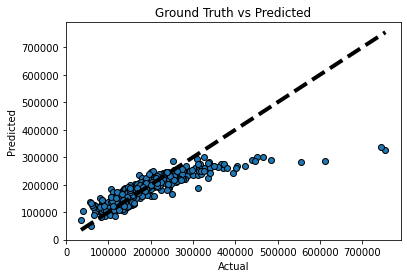

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
np.exp(y.head())

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    inf
1    inf
2    inf
3    inf
4    inf
Name: SalePrice, dtype: float64

In [ ]:
! pip install scikit-plot

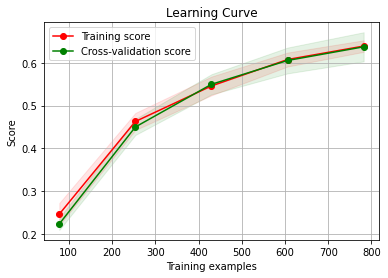

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(linRidge, X_train_scaled, y_train, scoring="r2") # neg_mean_absolute_error")

In [ ]:
# P = PolynomialFeatures(3, interaction_only=False, include_bias=False)
# model = make_pipeline(P, Ridge(tol=0.001, alpha=1, fit_intercept=False))
# model.fit(initial_conditions, times_of_flight)

In [ ]:

alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# enumerate through alphas with index and i
for  i in  alphas:    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)
    print(f'Ridge Regression: R^2 score on test set for  lamdbda= {i}, {reg.score(X_test, y_test):.3}')


Ridge Regression: R^2 score on test set for  lamdbda= 0.001, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.01, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.1, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 0.5, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 1, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 2, 0.786
Ridge Regression: R^2 score on test set for  lamdbda= 10, 0.786


In [ ]:
# 
alphas = np.logspace(-7, 30, 10)
# enumerate through alphas with index and i
for  i in  alphas:    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)
    print(f'Ridge Regression: R^2 score on test set for  alpha= {i}, {reg.score(X_test, y_test):.3}')


Ridge Regression: R^2 score on test set for  alpha= 1e-07, 0.786
Ridge Regression: R^2 score on test set for  alpha= 0.0012915496650148827, 0.786
Ridge Regression: R^2 score on test set for  alpha= 16.681005372000556, 0.786
Ridge Regression: R^2 score on test set for  alpha= 215443.46900318778, 0.714
Ridge Regression: R^2 score on test set for  alpha= 2782559402.2071147, 0.205
Ridge Regression: R^2 score on test set for  alpha= 35938136638046.11, 1.62e-06
Ridge Regression: R^2 score on test set for  alpha= 4.641588833612753e+17, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 5.994842503189372e+21, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 7.742636826811214e+25, -1.98e-05
Ridge Regression: R^2 score on test set for  alpha= 1e+30, -1.98e-05


In [ ]:



from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

alphas=np.logspace(-7, 30, 10)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(estimator=Ridge(), 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="alpha" ,
                                              param_range=alphas, 
                                              cv=10
 )

In [ ]:
train_scores

array([[7.38245582e-01, 7.60475079e-01, 7.50441986e-01, 7.87778316e-01,
        7.40716388e-01, 7.44083870e-01, 7.40055636e-01, 7.43444084e-01,
        7.46780934e-01, 7.43225354e-01],
       [7.38245582e-01, 7.60475079e-01, 7.50441986e-01, 7.87778316e-01,
        7.40716388e-01, 7.44083870e-01, 7.40055636e-01, 7.43444084e-01,
        7.46780934e-01, 7.43225354e-01],
       [7.38179825e-01, 7.60413860e-01, 7.50382886e-01, 7.87723139e-01,
        7.40650801e-01, 7.44017196e-01, 7.39996036e-01, 7.43374522e-01,
        7.46719388e-01, 7.43160915e-01],
       [6.00041192e-01, 6.30619919e-01, 6.19848283e-01, 6.86684287e-01,
        5.98464775e-01, 6.13139648e-01, 6.06149052e-01, 6.15009489e-01,
        6.08002824e-01, 6.07990589e-01],
       [1.84648330e-01, 1.90294684e-01, 1.89434296e-01, 1.96311309e-01,
        1.81950916e-01, 1.90697776e-01, 1.83331916e-01, 1.89290580e-01,
        1.89972505e-01, 1.87130514e-01],
       [1.92719858e-05, 1.96433683e-05, 1.97777500e-05, 1.98121790e-05,
   

In [ ]:
test_scores

array([[ 8.27690061e-01,  6.16412127e-01,  7.28156176e-01,
         4.22503179e-01,  7.98159600e-01,  7.87850296e-01,
         8.42274698e-01,  8.00334250e-01,  7.71684693e-01,
         7.92126808e-01],
       [ 8.27690120e-01,  6.16412122e-01,  7.28156161e-01,
         4.22502777e-01,  7.98159625e-01,  7.87850319e-01,
         8.42274726e-01,  8.00334377e-01,  7.71684810e-01,
         7.92126852e-01],
       [ 8.28379340e-01,  6.16283722e-01,  7.27922509e-01,
         4.17365451e-01,  7.98435235e-01,  7.88050374e-01,
         8.42598985e-01,  8.01808140e-01,  7.73103259e-01,
         7.92620113e-01],
       [ 7.50512965e-01,  4.71143144e-01,  5.91057368e-01,
         5.18707122e-02,  7.34136443e-01,  6.53315733e-01,
         7.42443570e-01,  6.40901673e-01,  7.34361395e-01,
         6.95036322e-01],
       [ 1.80405751e-01,  1.91705427e-01,  1.94733247e-01,
         1.44537886e-01,  1.82500078e-01,  1.68735249e-01,
         2.34405713e-01,  1.86848695e-01,  2.00597078e-01,
         1.

If the training score and the validation score are both low, the estimator will be underfitting. If the training score is high and the validation score is low, the estimator is overfitting and otherwise it is working very well. A low training score and a high validation score is usually not possible. All three cases can be found in the plot below where we vary the parameter  of an SVM on the digits dataset.

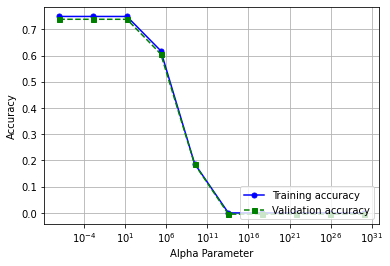

In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(alphas, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(alphas, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8, 1.03])
plt.show()

In [ ]:
np.power(10,3)

1000

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

In [ ]:


linRidge = Ridge(alpha=.0001).fit(X_train_scaled, y_train)

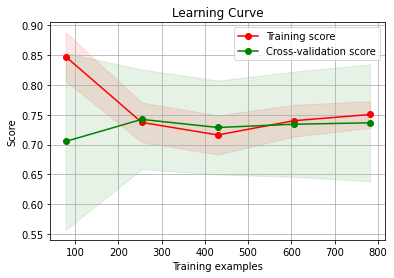

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt

skplt.estimators.plot_learning_curve(linRidge, X_train_scaled, y_train, scoring="r2") # neg_mean_absolute_error")